# Load and Preprocess the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the data
file_path = '../data/cleaned/AirlineData.csv'
df = pd.read_csv(file_path)
print(df.head())

             Airline                Source     Destination  Number of Stops  \
0     Etihad Airways  Toronto Pearson Intl  Bengaluru Intl                1   
1              Delta  Toronto Pearson Intl  Bengaluru Intl                1   
2  Multiple Airlines  Toronto Pearson Intl  Bengaluru Intl                2   
3  Multiple Airlines  Toronto Pearson Intl  Bengaluru Intl                2   
4  Multiple Airlines  Toronto Pearson Intl  Bengaluru Intl                2   

           Class        Date  Total_Stopover_Time  price in CAD  days_left  \
0  Economy Class  2024-06-02                  130        2340.0          1   
1  Economy Class  2024-06-02                 1335        1347.0          1   
2  Economy Class  2024-06-02                  420        1934.0          1   
3  Economy Class  2024-06-02                  380        2291.0          1   
4  Economy Class  2024-06-02                  175        2661.0          1   

  Departure_24hr Arrival_24hr  Arrival_Day_Offset  
0   

In [3]:
# Handle missing values
df.fillna(method='ffill', inplace=True)
# Define features and target
X = df.drop('price in CAD', axis=1)
y = df['price in CAD']
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate a Neural Network Model

In [4]:
# Fit and transform the preprocessor on the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [5]:
# Get the number of features after preprocessing
input_shape = X_train_transformed.shape[1]

# Define the neural network model
def build_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

In [6]:
# Initial Model Training and Evaluation
initial_model = build_model()
initial_model.fit(X_train_transformed, y_train, epochs=10, batch_size=32, validation_data=(X_test_transformed, y_test), verbose=1)

# Predict on the test set using initial model
y_pred_initial = initial_model.predict(X_test_transformed)

C:\Users\tanik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 3381082.5000 - mae: 1173.7429 - val_loss: 1287843.2500 - val_mae: 720.8953
Epoch 2/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 1386954.2500 - mae: 755.3550 - val_loss: 1142828.7500 - val_mae: 667.2305
Epoch 3/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 1269108.6250 - mae: 719.8187 - val_loss: 1060127.0000 - val_mae: 633.5532
Epoch 4/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1206376.7500 - mae: 696.1528 - val_loss: 994537.0000 - val_mae: 609.2264
Epoch 5/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1133833.1250 - mae: 674.5101 - val_loss: 943894.5625 - val_mae: 593.8674
Epoch 6/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1107159.0000 - mae: 665.1800 - val_loss: 904169.2500 - val_mae: 585.9708
Epoch 7/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1049166.1250 - mae: 650.2734 - val_loss: 877471.6875 - val_mae: 562.6850
Epoch 8/10
9617/9617 ━━━━━━━━━━━━━━━━━━━━ 25

In [7]:
# Calculate RMSE and R² for initial model
rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))
r2_initial = r2_score(y_test, y_pred_initial)
print(f'Initial Model - RMSE: {rmse_initial:.2f}, R²: {r2_initial:.2f}')

Initial Model - RMSE: 888.24, R²: 0.82


Text(0.5, 1.0, 'Initial Model\nRMSE: 888.24, R²: 0.82')

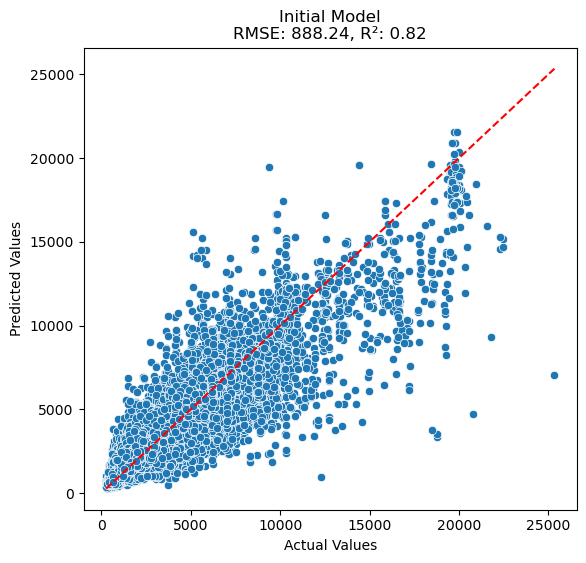

In [8]:
# Plotting the results for initial model
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_initial.flatten())
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Initial Model\nRMSE: {rmse_initial:.2f}, R²: {r2_initial:.2f}')